# Кластеризация. Домашнее задание

### Данные

В предложенных файлах информация с публичных слушаний Москвы по правилам землепользования и застройки (ПЗЗ). В них комментарии жителей города были застенагрофированы, проклассифицированы (за/против) и нанесены на карту. Данные предоставлены в 2 вариантах, для задания можно использовать любой:
* geo_comment.xlsx
    * **comment** - комментарий одного или списка жителей к проект
    * **multiplier** - количество авторов комментария (может быть 1, может быть список)
    * **x, y** - координаты адреса, по которому был дан определённой комментарий
    * **comment_class** - за (1) / против (-1)
* geo.xlsx - те же данные, но без текстов комментариев и по 1 голосу на строку (ранее в 1 строке могло быть **multiplier** > 1 голоса)
    * **x, y** - координаты адреса, по которому был дан определённой комментарий
    * **comment_class** - за (1) / против (-1)
    
### Обязательное задание

* визуально разделить город на районы безотносительно голосов (провести кластеризацию и вывести картинку)
* аналогично исследовать скопления голосов за и против отдельно
* *подобрать оптимальное число кластеров при помощи кода из тетрадки в конце занятия (оптимально)*
* приложить ноутбук

### Дополнительные задания
* найти наиболее активные в голосовании районы *(подсказка: DBSCAN, не плотные районы обозначены одной меткой и закрашены одним цветом, cmap='gray')*
* для тех, кто уже попробовал работу с текстом: выделить основные тематики комментариев жителей, можно использовать всю имеющуюся дополнительную информацию

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_excel('geo.xlsx')
data.head()

,x,y,comment_class
0,37.612416,55.777454,-1
1,37.612416,55.777454,-1
2,37.603298,55.742108,-1
3,37.558526,55.728758,-1
4,37.566431,55.731794,-1


In [3]:
data.comment_class.value_counts()

-1    95147
 1    13659
Name: comment_class, dtype: int64

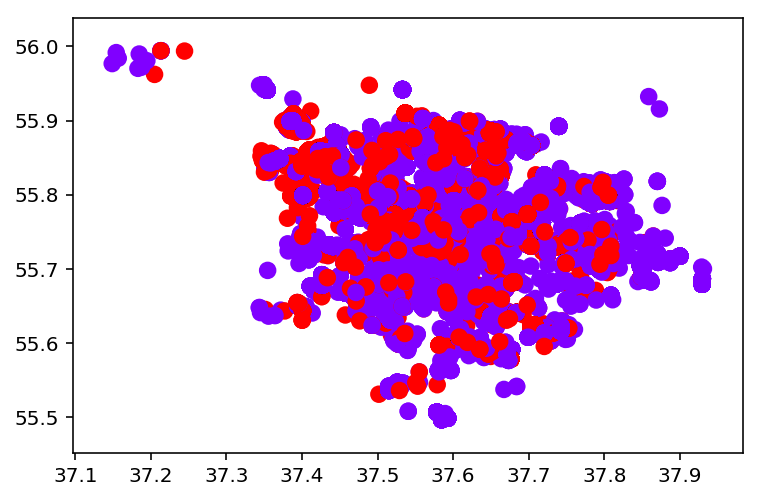

In [6]:
plt.scatter(data['x'], data['y'], c=data['comment_class'], cmap='rainbow', s=60)

In [33]:
U = data[data['x']<37.559]
len(U)

53601

In [38]:
DL = data[(data['x']<37.559) & (data['y']<55.765)]
#print(DL.comment_class.value_counts())
DR = data[(data['x']>=37.559) & (data['y']<55.765)]
#print(DR.comment_class.value_counts())
UL = data[(data['x']<37.559) & (data['y']>=55.765)]
#print(UL.comment_class.value_counts())
UR = data[(data['x']>=37.559) & (data['y']>=55.765)]
#print(UR.comment_class.value_counts())

listt = [DL,DR,UL,UR]

In [39]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

DL_scaled = scaler.fit_transform(DL[['x','y']])
DR_scaled = scaler.fit_transform(DR[['x','y']])
UL_scaled = scaler.fit_transform(UL[['x','y']])
UR_scaled = scaler.fit_transform(UR[['x','y']])

listt_scaled = [DL_scaled,DR_scaled,UL_scaled,UR_scaled]

In [40]:
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

%config InlineBackend.figure_format = 'retina'
from pylab import rcParams
rcParams['figure.figsize'] = (12, 9)

In [44]:
X_scaled = scaler.fit_transform(data[['x','y']])

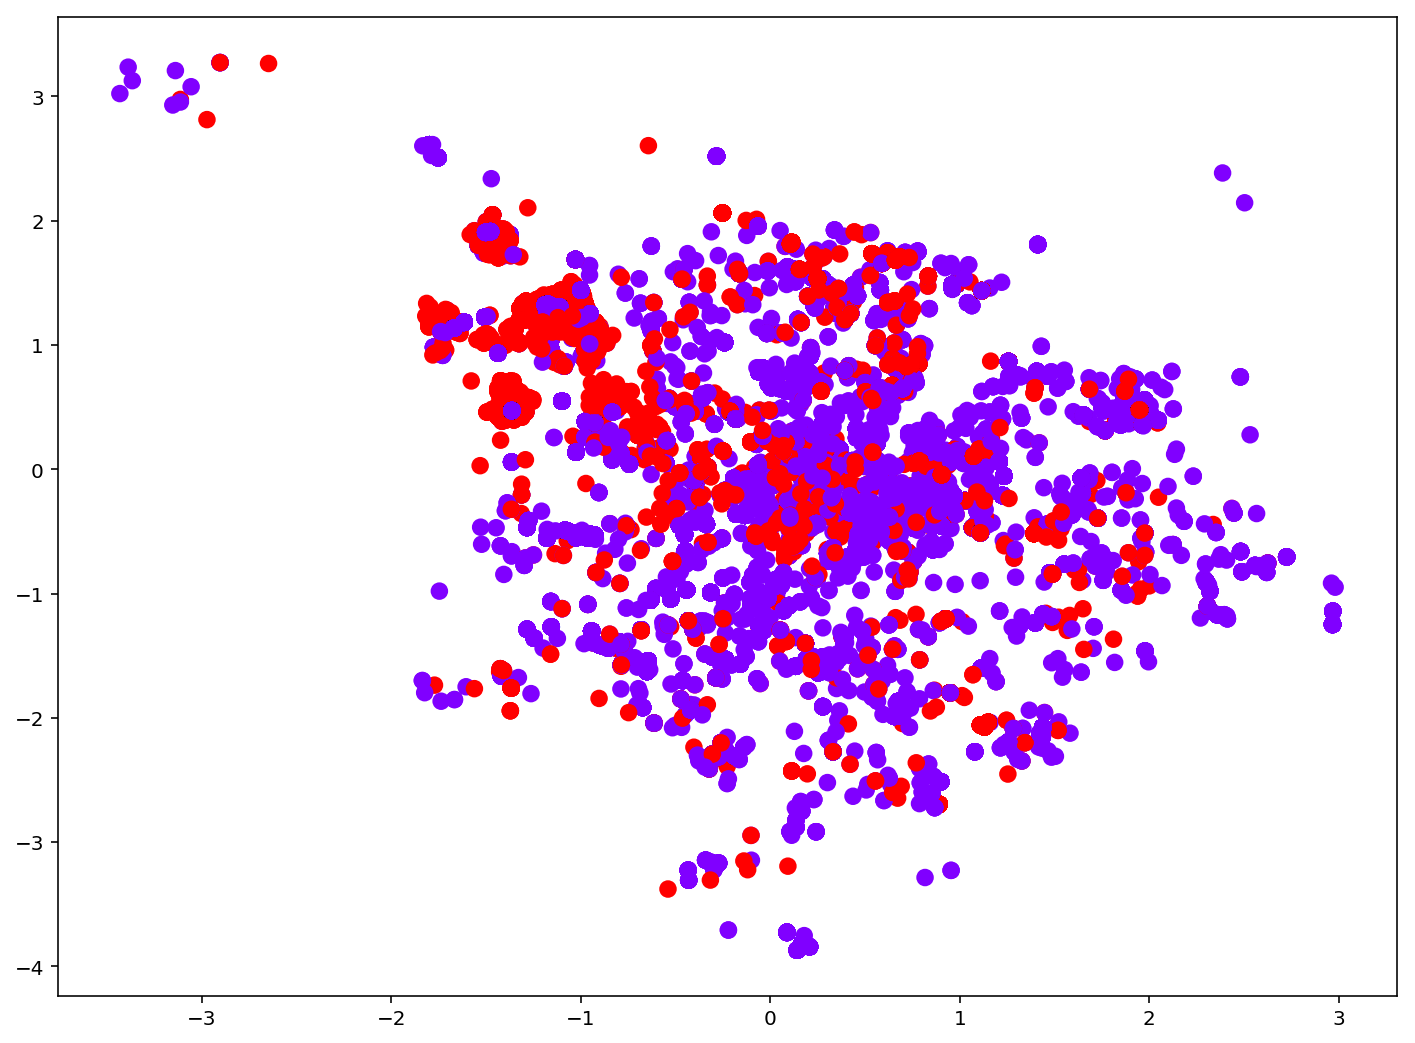

In [90]:
plt.scatter(X_scaled[:,0], X_scaled[:,1], c=data['comment_class'], cmap='rainbow', s=60)

In [42]:
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import adjusted_rand_score, silhouette_score

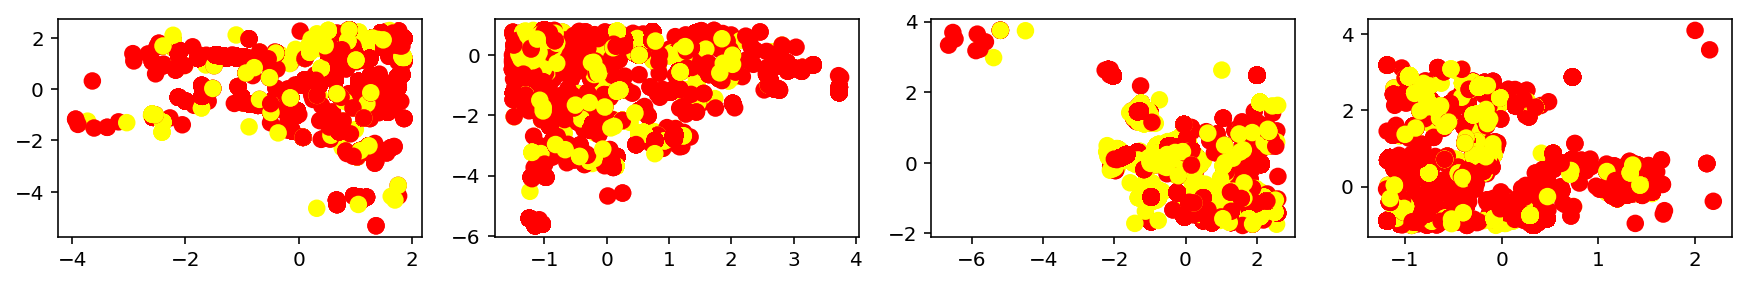

In [72]:
fig, axes = plt.subplots(1, 4, figsize=(15, 2))
for ax, square, i in zip(axes[:], listt_scaled, range(4)):
    ax.scatter(square[:,0],square[:,1], c = listt[i].comment_class, cmap='autumn', s=60)

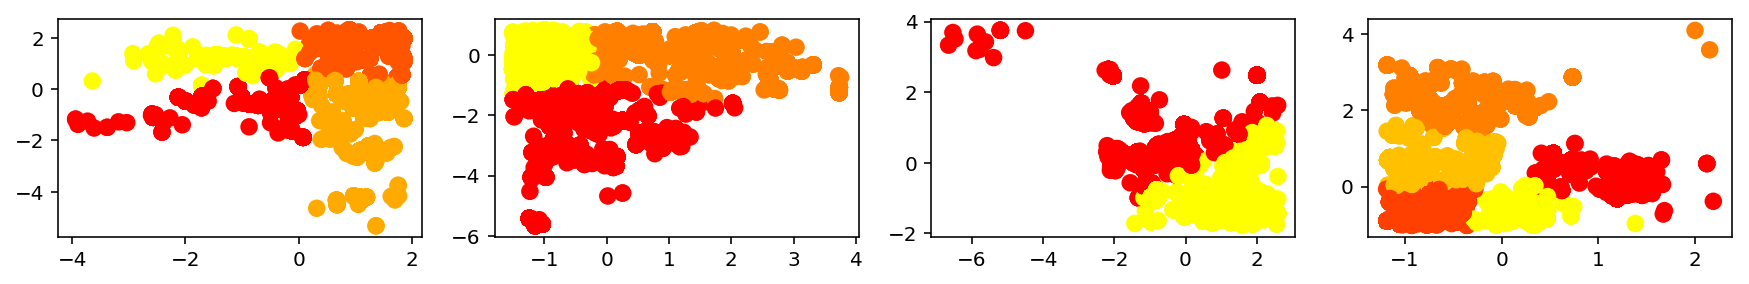

In [73]:
fig, axes = plt.subplots(1, 4, figsize=(15, 2))
for ax, square in zip(axes[:], listt_scaled):
    cluster = KMeans(n_clusters=n_clasters(square)).fit_predict(square)
    ax.scatter(square[:,0],square[:,1], c = cluster, cmap='autumn', s=60)

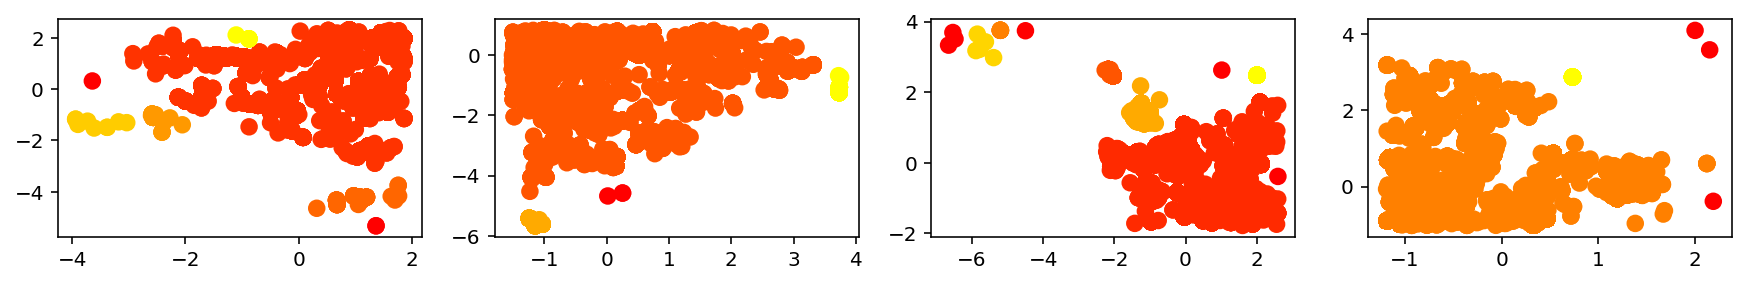

In [74]:
fig, axes = plt.subplots(1, 4, figsize=(15, 2))
for ax, square in zip(axes[:], listt_scaled):
    cluster = DBSCAN().fit_predict(square)
    ax.scatter(square[:,0],square[:,1], c = cluster, cmap='autumn', s=60)

Нахождение оптимального числа кластеров

In [58]:
def n_clasters(data):
    k_inertia = []
    ks = range(1,11)

    for k in ks:
        clf_kmeans = KMeans(n_clusters=k)
        clusters_kmeans = clf_kmeans.fit_predict(data )
        k_inertia.append(clf_kmeans.inertia_)

    diff = np.diff(k_inertia)
    diff_r = diff[1:] / diff[:-1]
    k_opt = ks[np.argmin(diff_r)+1]
    
    return k_opt    

In [76]:
k_inertia = []
ks = range(1,11)

for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clusters_kmeans = clf_kmeans.fit_predict(X_scaled, )
    k_inertia.append(clf_kmeans.inertia_)

diff = np.diff(k_inertia)
diff_r = diff[1:] / diff[:-1]
k_opt = ks[np.argmin(diff_r)+1]
k_opt

8

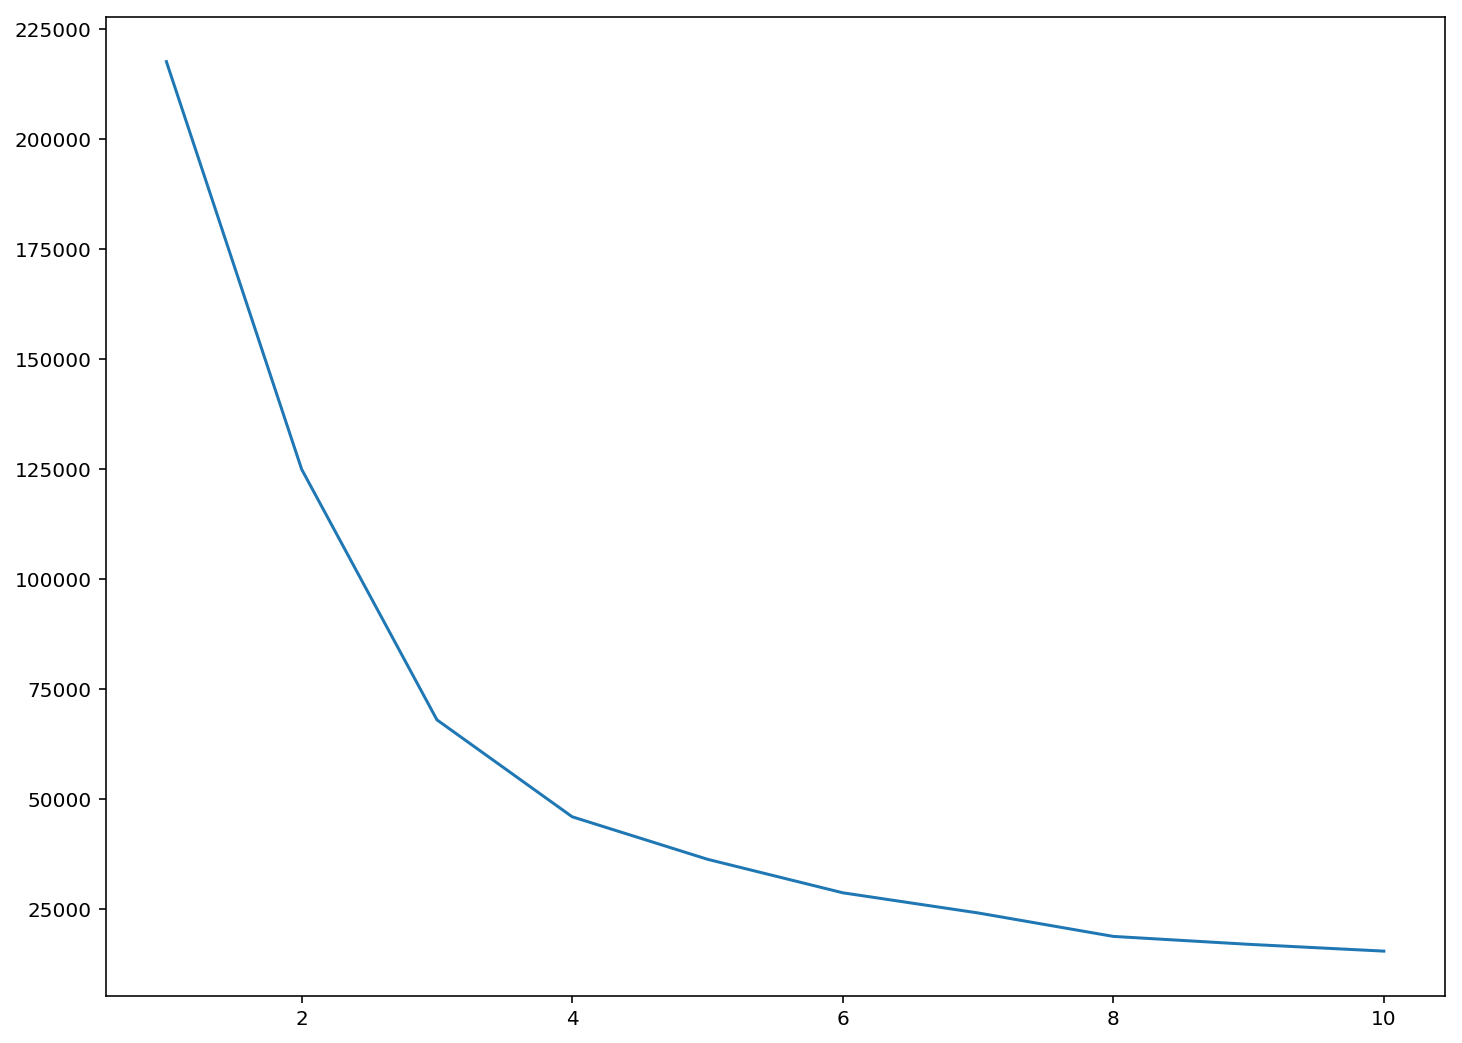

In [77]:
plt.plot(ks, k_inertia)

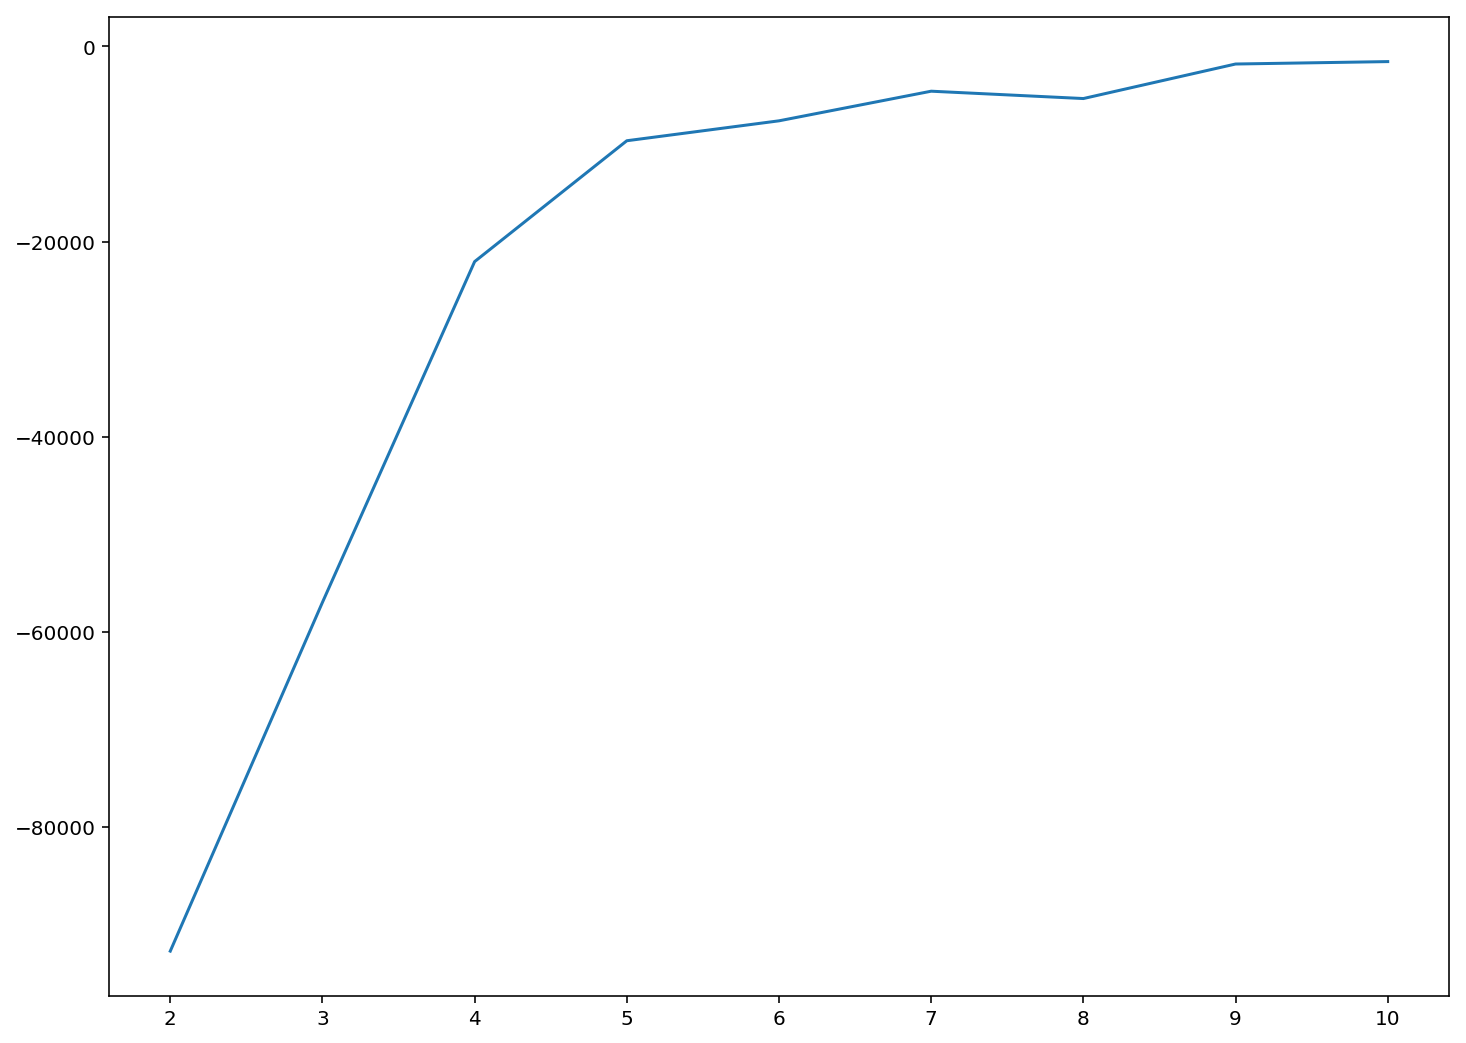

In [78]:
diff = np.diff(k_inertia)
plt.plot(ks[1:], diff)

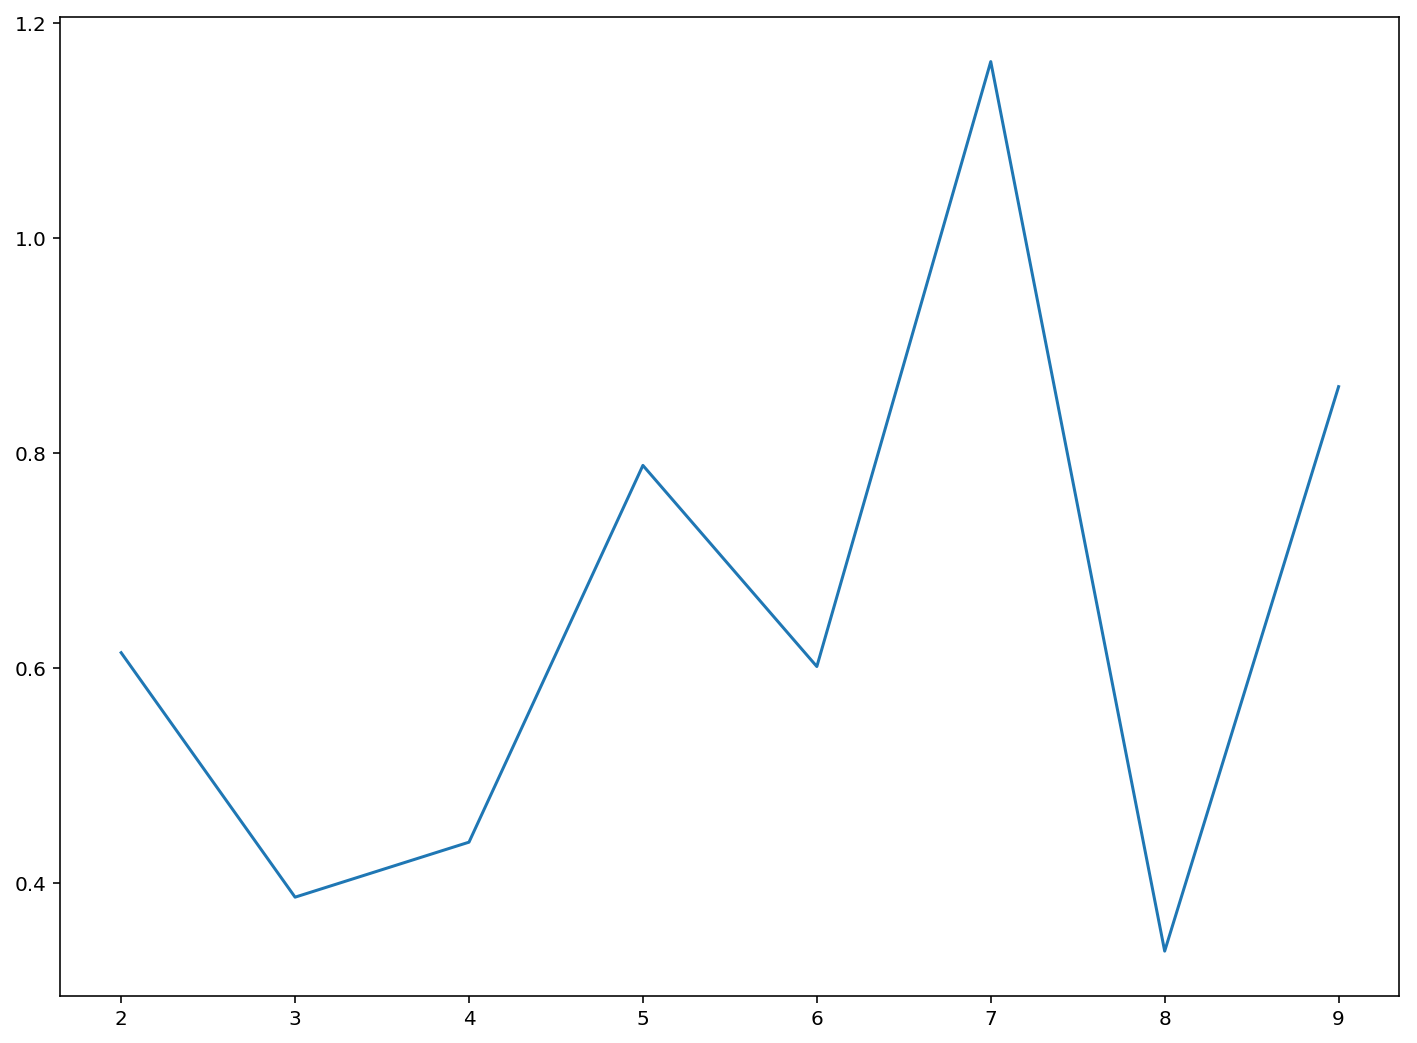

In [79]:
diff_r = diff[1:] / diff[:-1]
plt.plot(ks[1:-1], diff_r)

In [80]:
k_opt = ks[np.argmin(diff_r)+1]
k_opt

8